<a href="https://colab.research.google.com/github/CristianAlegreBustos/Artificial-Intelligence/blob/main/Tranformer__Text_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Automatic Text Content Generator

# I. Introduction
We train a model with the content of these author’s published works in order to generate new text content with the same style and voice as the original author.


### Narrow circumstances

We conducted this experiment using Google Colab’s free tier, which comes with notable limitations in runtime duration, storage, and compute power

While Colab enabled us to prototype and explore quickly, additional compute time and budget would allow us to scale up experiments, improve model quality, and reach more coherent, author‑style outputs.
---

## II. Methodology
For our network we used transformer layers to generate the data. These layers offer us a way to process data parallelly, increasing the performance of the training. This parallel input also allows us to process data that has differing variable lengths like we have in our training dataset.

For training the model the method that we used is one called Teacher forcing. This method solves an issue during training where the model’s current output becomes its next input. If one of its inputs is wrong then this can slowly build over time until the model is producing gibberish. Teacher forcing replaces the model’s bad output with the expected output for the next time the model runs its computation. This solution is easy to deploy and leads to much faster model training, but it can come with some downsides when the final model is deployed.

For judging our model’s accuracy we used logits and sparse categorical cross-entropy. The logits work as a numerical output that we can use as a predictor of likelihood for our output. This is then passed into the sparse categorical cross‑entropy function which will give us a loss output that we can use for seeing how well our model is performing.

---

## III. Results
The following table summarizes the outcomes of the various training strategies and parameters and our observation of the results:

| Experiment       | vocab_size | sequence_length | pretrain_epochs | finetune_epochs | Learning Rate (Fine‑tune) | Key Result                                                |
|------------------|------------|------------------|------------------|------------------|----------------------------|-----------------------------------------------------------|
| Baseline         | 8,192      | 128              | 25               | 3                | 1.00E‑05                   | Incoherent, repetitive words                              |
| + More Time      | 8,192      | 128              | 100              | 15               | 1.00E‑05                   | Slightly better, author‑specific words appear             |
| + Larger Vocab   | 16,384     | 128              | 100              | 15               | 1.00E‑05                   | Fewer [UNK] tokens, but still no structure                |
| + Warmup         | 16,384     | 128              | 100              | 15               | 5.00E‑05                   | Improved training stability (hypothesis)                 |
| + More Data      | 16,384     | 128              | 100              | 15               | 5.00E‑05                   | Final Recommended Configuration                           |


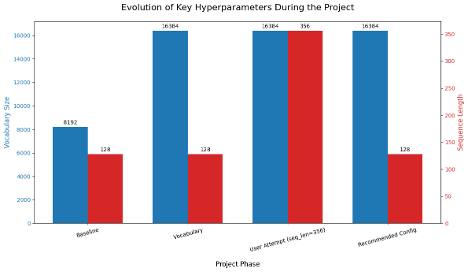

Below are Github Gist links to the notebooks we used during this case study:

- https://colab.research.google.com/drive/1dk6aTzNnDR‑WNYTGYXnHc0Bc0mgGLHrF?authuser=1#scrollTo=XqfcwtwfBr0T

**Prompt:**  
She entered the room and was surprised to see that  
**Text by Model:**  
she entered the room and was surprised to see that she had not turned away, when catherine, whose terror, her face, and the mother, stood anxiously watching her sister for the next moment, cried eagerly," you have seen my dear, how d’ [UNK] come in here! - - how strange!" and listening began another application of these congratulations, which, on the occasion, really expecting to be in the house, was quite [UNK]. her anxious heart beat quick and agitated as she felt and cried in a shrinking from

---

## IV. Discussion Responses
Firstly, we debated between LSTM and GRU layers. GRUs train faster and need less data, but we ultimately chose transformer layers for their ability to process longer sequences in parallel, unlike the sequential nature of GRUs.

Next, we addressed the issue of unintelligible output. We recommend increasing training epochs, as the model likely hasn’t learned the patterns well yet. If output doesn’t improve after more steps, consider adding layers to improve its capacity to fit the data.

We also thought about how to make the project more engaging. To excite investors, we could show outputs—like interactive demos, graphs, or sample text—to highlight current performance and future potential.

We compared teacher forcing with curriculum learning. Teacher forcing is quicker to implement and improves short‑term accuracy, but it can make the model dependent. Curriculum learning takes longer but helps the model learn more independently.

In short, teacher forcing is faster but riskier long‑term. Curriculum learning is more complex but can yield a more reliable model with time and effort.

We’re continuing to use logits with sparse categorical cross‑entropy, as used by the previous team. It provides good prediction probability and fits our current training setup well.

Lastly, to boost performance, we’ll incorporate text from Wikipedia and other Creative Commons sources. These are modern, clean, and manageable, offering useful data for training.


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 159.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
# -*- coding: utf-8 -*-
"""
Tranformer_starter_publishing_word_unified.ipynb

Versión final del script que implementa un Transformer con una estrategia
de tokenización por palabras y vocabulario unificado para máxima estabilidad.
Incluye el flujo completo de pre-entrenamiento y fine-tuning.
"""

# ==============================================================================
# 1. IMPORTACIONES Y CONFIGURACIÓN INICIAL
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.layers import StringLookup, Layer, Embedding, MultiHeadAttention, LayerNormalization, Dense, Dropout, TextVectorization
import numpy as np
import os
import io
import re
import string
import gc
import random
import contextlib

print("TensorFlow:", tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# --- Parámetros Globales ---
path = ''
vocab_size = 32000
sequence_length = 128 # Longitud de secuencia para palabras
BATCH_SIZE = 64
BUFFER_SIZE = 10000

# ==============================================================================
# 2. FUNCIONES DE PREPROCESAMIENTO Y OBTENCIÓN DE DATOS
# ==============================================================================

def preprocess_text(text):
    """Limpia y pre-procesa el texto para la tokenización por palabras."""
    text = text.replace("Project Gutenberg", "")
    text = text.replace("Gutenberg", "")
    text = text.replace("\r", "")
    text = text.replace("“", "\"")
    text = text.replace("”", "\"")
    text = text.replace("\n", " ")
    text = text.replace("\t", " ")
    text = re.sub(r"(?<![a-zA-Z])([A-Z])", lambda match: f"^{match.group(0).lower()}", text)
    text = re.sub(r"([A-Z])", lambda match: f"{match.group(0).lower()}", text)
    text = re.sub(r"\s+", " ", text)
    for punctuation in string.punctuation:
        text = text.replace(punctuation, f" {punctuation} ")
    return text

def postprocess_text(text):
    """Revierte parte del pre-procesamiento para hacer el texto legible."""
    text = re.sub(r"\^([a-z])", lambda match: f"{match.group(1).upper()}", text)
    text = text.replace("^", "")
    # Colapsa espacios extra que puedan quedar después de unir tokens
    text = re.sub(r'\s+([,.!?;"])', r'\1', text)
    return text

def getMyText():
    """Descarga el corpus del autor específico (conan doyle)."""
    file_name = 'conan_doyle.txt'
    file_url = 'https://www.gutenberg.org/files/1661/1661-0.txt'
    downloaded_path = tf.keras.utils.get_file(file_name, file_url, cache_dir='.', cache_subdir='')
    with open(downloaded_path, 'rb') as f:
        text = f.read().decode(encoding='utf-8')
    return preprocess_text(text)

def getRandomText(numbooks=50, verbose=False):
    """Descarga un corpus general de N libros de Project Gutenberg."""
    download_log = io.StringIO()
    text_random = ''
    books_found = 0
    while books_found < numbooks:
        booknum = random.randint(100, 70000)
        if verbose: print(f"Intentando libro #{booknum}...")
        try:
            url = f'https://www.gutenberg.org/cache/epub/{booknum}/pg{booknum}.txt'
            with contextlib.redirect_stdout(download_log):
                path_to_file_temp = tf.keras.utils.get_file(f'pg{booknum}.txt', url, cache_dir='.', cache_subdir='')
            with open(path_to_file_temp, 'rb') as f:
                temptext = f.read().decode(encoding='utf-8')
            if 'Language: English' in temptext and len(temptext) > 200000:
                text_random += temptext[2000:202000]
                books_found += 1
                if verbose: print(f"Libro #{booknum} descargado. {books_found}/{numbooks} libros encontrados.")
        except Exception:
            continue
    return preprocess_text(text_random)

def split_input_target(sequence):
    return sequence[:-1], sequence[1:]

def setup_dataset(dataset):
    return dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# ==============================================================================
# 3. PREPARACIÓN DE DATOS MEJORADA (POR PALABRAS, CON VOCABULARIO UNIFICADO)
# ==============================================================================
print("--- Iniciando Preparación de Datos por Palabras (Vocabulario Unificado) ---")

# 3.1. Obtener AMBOS corpus
print("Obteniendo los corpus de texto...")
corpus_autor = getMyText()
corpus_general = getRandomText(numbooks=200, verbose=True)

# 3.2. Crear un corpus COMBINADO para adaptar el vocabulario
print("Creando corpus combinado para el vocabulario...")
texto_combinado = corpus_autor + " " + corpus_general

# 3.3. Crear y adaptar la capa TextVectorization SOBRE EL TEXTO COMBINADO
print("Creando y adaptando el vocabulario unificado...")
vectorize_layer = TextVectorization(
    standardize='lower',
    split='whitespace',
    max_tokens=vocab_size,
    output_mode='int'
)
vectorize_layer.adapt([texto_combinado])
vocabulary = vectorize_layer.get_vocabulary()
del texto_combinado
gc.collect()

# 3.4. Crear los datasets separados USANDO EL MISMO vectorize_layer
print("Creando datasets de pre-entrenamiento y fine-tuning...")
def text_to_dataset_unified(text, vector_layer):
    all_ids = vector_layer([text])
#Aplanar vector
    all_ids = tf.reshape(all_ids, [-1])
    ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
    sequences = ids_dataset.batch(sequence_length + 1, drop_remainder=True)
    dataset = sequences.map(split_input_target)
    return dataset

dataset_preentrenamiento = setup_dataset(text_to_dataset_unified(corpus_general, vectorize_layer))
dataset_finetuning = setup_dataset(text_to_dataset_unified(corpus_autor, vectorize_layer))

del corpus_autor, corpus_general
gc.collect()

print("✅ Preparación por palabras unificada completada.")


# ==============================================================================
# 4. DEFINICIÓN DEL MODELO TRANSFORMER
# ==============================================================================
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]
    depths = np.arange(depth)[np.newaxis, :] / depth
    angle_rates = 1 / (10000**depths)
    angle_rads = positions * angle_rates
    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1)
    return tf.cast(pos_encoding, dtype=tf.float32)

class PositionalEmbedding(Layer):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.embedding = Embedding(vocab_size, embedding_dim, mask_zero=True)
        self.pos_encoding = positional_encoding(length=2048, depth=embedding_dim)
    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.embedding_dim, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

class TransformerBlock(Layer):
    def __init__(self, embedding_dim, num_heads, feed_forward_dim, dropout_rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)
        self.ffn = tf.keras.Sequential([Dense(feed_forward_dim, activation='relu'), Dense(embedding_dim)])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)
    def call(self, x, training=False):
        attn_output = self.mha(query=x, value=x, key=x, use_causal_mask=True)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TransformerTextModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, num_heads, feed_forward_dim, num_transformer_blocks, dropout_rate=0.1):
        super().__init__()
        self.embedding = PositionalEmbedding(vocab_size, embedding_dim)
        self.transformer_blocks = [
            TransformerBlock(embedding_dim, num_heads, feed_forward_dim, dropout_rate)
            for _ in range(num_transformer_blocks)
        ]
        self.dense_output = Dense(vocab_size)
    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        for block in self.transformer_blocks:
            x = block(x, training=training)
        return self.dense_output(x)

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = tf.cast(d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


TensorFlow: 2.19.0
GPU disponible: []
--- Iniciando Preparación de Datos por Palabras (Vocabulario Unificado) ---
Obteniendo los corpus de texto...
607504/607504 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Intentando libro #34445...
Intentando libro #39082...
Libro #39082 descargado. 1/200 libros encontrados.
Intentando libro #66226...
Intentando libro #16074...
Libro #16074 descargado. 2/200 libros encontrados.
Intentando libro #14238...
Intentando libro #57020...
Intentando libro #49773...
Intentando libro #23063...
Intentando libro #46675...
Libro #46675 descargado. 3/200 libros encontrados.
Intentando libro #59745...
Libro #59745 descargado. 4/200 libros encontrados.
Intentando libro #14935...
Intentando libro #2791...
Libro #2791 descargado. 5/200 libros encontrados.
Intentando libro #21291...
Libro #21291 descargado. 6/200 libros encontrados.
Intentando libro #65695...
Libro #65695 descargado. 7/200 libros encontrados.
Intentando libro #34294...
Intentando libro #14212...
Intentando libro #

In [ ]:
# ==============================================================================
# 5. ETAPA DE PRE-ENTRENAMIENTO
# ==============================================================================
print("--- Iniciando Etapa de Pre-entrenamiento (Palabras) ---")

embedding_dim = 512
num_heads = 8
feed_forward_dim = 2048
num_transformer_blocks = 4

transformer_model = TransformerTextModel(
    vocab_size=len(vocabulary),
    embedding_dim=embedding_dim,
    num_heads=num_heads,
    feed_forward_dim=feed_forward_dim,
    num_transformer_blocks=num_transformer_blocks
)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
lr_schedule = CustomSchedule(embedding_dim)
optimizer_pre = tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
transformer_model.compile(optimizer=optimizer_pre, loss=loss)

epocas_preentrenamiento = 100
transformer_model.fit(dataset_preentrenamiento, epochs=epocas_preentrenamiento, verbose=1)

transformer_model.save_weights(path + "word_unified_pretrained.weights.h5")
print("Pre-entrenamiento completado.")


--- Iniciando Etapa de Pre-entrenamiento (Palabras) ---
Epoch 1/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2357s 2s/step - loss: 7.6749
Epoch 2/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2350s 2s/step - loss: 4.6848
Epoch 3/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2351s 2s/step - loss: 4.3013
Epoch 4/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2350s 2s/step - loss: 4.1179
Epoch 5/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2347s 2s/step - loss: 3.9549
Epoch 6/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2346s 2s/step - loss: 3.7831
Epoch 7/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2349s 2s/step - loss: 3.6417
Epoch 8/100
1114/1114 ━━━━━━━━━━━━━━━━━━━━ 2353s 2s/step - loss: 3.5130
Epoch 9/100
 351/1114 ━━━━━━━━━━━━━━━━━━━━ 26:53 2s/step - loss: 3.4254

KeyboardInterrupt: 

In [ ]:

# ==============================================================================
# 6. ETAPA DE FINE-TUNING
# ==============================================================================
print("--- Iniciando Etapa de Fine-Tuning (Palabras) ---")

for inputs, targets in dataset_finetuning.take(1):
    _ = transformer_model(inputs)
transformer_model.load_weights(path + "word_unified_pretrained.weights.h5")

optimizer_fine = tf.keras.optimizers.Adam(learning_rate=5e-5)
transformer_model.compile(optimizer=optimizer_fine, loss=loss)

epocas_finetuning = 20
transformer_model.fit(dataset_finetuning, epochs=epocas_finetuning, verbose=1)

transformer_model.save_weights(path + "word_unified_finetuned.weights.h5")
print("✅ Fine-Tuning completado.")

In [ ]:
# ==============================================================================
# 7. GENERACIÓN DE TEXTO CON EL MODELO FINE-TUNED
# ==============================================================================

class TextGenerator:
    def __init__(self, model, vectorize_layer, vocabulary, temperature=1.0):
        self.model = model
        self.vectorize_layer = vectorize_layer
        self.temperature = temperature
        self.id_to_word_table = tf.constant(vocabulary)

    def generate(self, prompt, max_length=200):
        processed_prompt = preprocess_text(prompt)
        input_ids = self.vectorize_layer([processed_prompt])

        for _ in range(max_length):
            predictions = self.model(input_ids)
            last_token_logits = predictions[:, -1, :]
            scaled_logits = last_token_logits / self.temperature
            new_token_id = tf.random.categorical(scaled_logits, num_samples=1)
            input_ids = tf.concat([input_ids, new_token_id], axis=1)

        output_words = tf.gather(self.id_to_word_table, input_ids)


        generated_text = tf.strings.reduce_join(output_words, axis=-1, separator=' ').numpy()[0].decode('utf-8')

        return postprocess_text(generated_text)


print("\n--- Iniciando Generación de Texto ---")

# 1. Crea una instancia del generador
text_generator = TextGenerator(
    model=transformer_model,
    vectorize_layer=vectorize_layer,
    vocabulary=vocabulary,
    temperature=0.7
)

# 2. prompt
prompt_inicial = "The world seemed like such a peaceful place until the magic tree was discovered in London."

# 3. Genera el texto
texto_generado = text_generator.generate(prompt_inicial, max_length=250)

print(f"Prompt: {prompt_inicial}\n")
print("Texto Generado:")
print(texto_generado)